In [2]:
# 쥬피터노트북 셀 스타일 조절 
from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 100% !important; }</style>"))

# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 1) 관련 모듈 임포트 
import pandas as pd
import time
from selenium import webdriver
from bs4 import BeautifulSoup

## 셀레니움 + 뷰티풀숩
```
1) 셀레니움으로 크롬웹브라우저 실행, 웹페이지 이동
2) 현재 html 페이지를 변수에 저장
3) html 페이지 => 뷰티풀숩 객체로 변경
4) 뷰티풀숩의 메서드를 이용하여 정보 추출
5) 데이타프레임으로 변경 및 csv 저장
```

In [57]:
# 2) 셀레니움으로 크롬웹브라우저 실행, 웹페이지 이동
driver = webdriver.Chrome('chromedriver.exe')
time.sleep(2)
url = 'http://www.google.com'
driver.get(url)

<class 'str'>


'<html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/manifest?pwa=webhp" crossorigin="use-credentials" rel="manifest"><title>Google</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.BYmJjssVfqI.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo80_DzWbqWOZXEixUAk9-Z2HYlC7A/cb=gapi.loaded_0" nonce="BtbsoVIuFhfzCJ5c1o_l0g" async=""></script><script nonce="BtbsoVIuFhfzCJ5c1o_l0g">(function(){window.google={kEI:\'ZE6YYoqcOtGK2roPvua_qAU\',kEXPI:\'31\',kBL:\'sVJv\'};google.sn=\'webhp\';google.kHL=\'ko\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}\nfunction n(
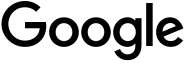

In [58]:
# 3) 웹브라우저의 현재 html 페이지 소스를 변수에 저장
# 드라이버객체.page_source => 파이썬의 str

html_str = driver.page_source
print(type(html_str))
html_str

<html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><link crossorigin="use-credentials" href="/manifest?pwa=webhp" rel="manifest"/><title>Google</title><script async="" nonce="BtbsoVIuFhfzCJ5c1o_l0g" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.BYmJjssVfqI.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo80_DzWbqWOZXEixUAk9-Z2HYlC7A/cb=gapi.loaded_0"></script><script nonce="BtbsoVIuFhfzCJ5c1o_l0g">(function(){window.google={kEI:'ZE6YYoqcOtGK2roPvua_qAU',kEXPI:'31',kBL:'sVJv'};google.sn='webhp';google.kHL='ko';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(a,b,c,d,g
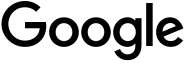

In [59]:
# 4) 뷰티풀숩 객체로 변경
soup = BeautifulSoup(html_str)
soup

In [60]:
# 5) 필요한 요소 추출 후 텍스트 출력
# 대한민국 글자만 표시하기
# 소스 파악 
# <div class="uU7dJb">대한민국</div>
target = soup.select_one('div.uU7dJb').text
print(target)

대한민국


## 멜론 차트 순위

https://www.melon.com/chart/

멜론 사이트를 Request 로 요청
- 406 Not Acceptable(접수할 수 없음)
- 에러코드 정리 : https://activeks.tistory.com/entry/ks-life

### 순위, 곡명, 아티스트, 앨범명, 앨범이미지, 앨범URL

In [61]:
import requests

url = 'https://www.melon.com/chart/'
res = requests.get(url)

print(res.status_code)
html_text = res.text
html_text

406


''

In [62]:
# 2) 셀레니움 드라이버 객체 생성 후 크롬 웹브라우저 구동

# 멜론 사이트로 이동
driver = webdriver.Chrome('chromedriver.exe')
time.sleep(2)
url = 'https://www.melon.com/chart/'
driver.get(url)

In [63]:
# 3) 웹브라우저의 현재 html 페이지 소스를 변수에 저장
# 드라이버객체.page_source => 파이썬의 str

html_str = driver.page_source
print(type(html_str))
html_str

<class 'str'>


'<html lang="ko" class="narrow-screen"><head>\n\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\n\t\n\n\t<title>멜론차트&gt;TOP100&gt;멜론</title>\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널">\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!">\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b">\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc">\n\t<meta property="fb:app_id" content="357952407588971">\n\t<meta property="og:title" content="Melon">\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png">\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론">\n\t<meta property="og:url" content="http://www.melon.com/

In [64]:
# 4) 뷰티풀숩 객체로 변경
soup = BeautifulSoup(html_str)
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" property="o

In [65]:
# 5) 소스 파악
# 순위, 곡명, 아티스트, 앨범명, 앨범이미지, 앨범URL
# table > thead > tr 제목
# table > tbody > tr 내용

In [66]:
# table 태그 확인
print(len(soup.select('table')))
print(len(soup.select('tbody > tr')))

1
100


In [67]:
# 6) tr만 리스트로 저장
target = soup.select('tbody > tr')
len(target)

100

In [105]:
# 7) 1위만 정보 추출
# 순위, 곡명, 아티스트, 앨범명, 앨범이미지, 앨범URL
base = 'https://www.melon.com/album/detail.htm?albumId='
rank = target[0].select_one('span.rank').text + '위'
song_name = target[0].select_one('div.ellipsis.rank01 span').text.strip()
singer = target[0].select_one('div.ellipsis.rank02 a').text
album = target[0].select_one('div.ellipsis.rank03 a').text
album_img_url = target[0].select_one('img')['src'].replace('/melon/resize/120/quality/80/optimize','')
album_url = base + target[0].select_one('div.ellipsis.rank03 a')['href'].split("'")[1]
print(rank)
print(song_name)
print(singer)
print(album)
print(album_img_url)
print(album_url)


1위
That That (prod. & feat. SUGA of BTS)
싸이 (PSY)
싸다9
https://cdnimg.melon.co.kr/cm2/album/images/109/37/474/10937474_20220428225312_500.jpg
https://www.melon.com/album/detail.htm?albumId=10937474


In [95]:
# 8) 전체 100위까지 리스트로 저장하고 데이타프레임으로 변경한 후 csv 저장
melon_list = []
base = 'https://www.melon.com/album/detail.htm?albumId='
for li in target:
    rank = li.select_one('span.rank').text + '위'
    song_name = li.select_one('div.ellipsis.rank01 span').text.replace('\n','')
    singer = li.select_one('div.ellipsis.rank02 a').text
    album = li.select_one('div.ellipsis.rank03 a').text
    album_img_url = li.select_one('img')['src'].replace('/melon/resize/120/quality/80/optimize','')
    album_url = base + li.select_one('div.ellipsis.rank03 a')['href'].split("'")[1]
    print(rank, song_name, singer, album_img_url, album_url)
    melon_list.append([rank, song_name, singer, album_img_url, album_url])

1위 That That (prod. & feat. SUGA of BTS) 싸이 (PSY) https://cdnimg.melon.co.kr/cm2/album/images/109/37/474/10937474_20220428225312_500.jpg https://www.melon.com/album/detail.htm?albumId=10937474
2위 TOMBOY (여자)아이들 https://cdnimg.melon.co.kr/cm2/album/images/108/90/384/10890384_20220314111504_500.jpg https://www.melon.com/album/detail.htm?albumId=10890384
3위 LOVE DIVE IVE (아이브) https://cdnimg.melon.co.kr/cm2/album/images/109/09/179/10909179_20220405103521_500.jpg https://www.melon.com/album/detail.htm?albumId=10909179
4위 사랑인가 봐 멜로망스 https://cdnimg.melon.co.kr/cm2/album/images/108/71/162/10871162_20220217162422_500.jpg https://www.melon.com/album/detail.htm?albumId=10871162
5위 봄여름가을겨울 (Still Life) BIGBANG (빅뱅) https://cdnimg.melon.co.kr/cm2/album/images/109/08/834/10908834_20220404174407_500.jpg https://www.melon.com/album/detail.htm?albumId=10908834
6위 사랑은 늘 도망가 임영웅 https://cdnimg.melon.co.kr/cm2/album/images/107/35/654/10735654_20211008114339_500.jpg https://www.melon.com/album/detail.htm

53위 Domino 세븐틴 https://cdnimg.melon.co.kr/cm2/album/images/109/22/231/10922231_20220527120653_500.jpg https://www.melon.com/album/detail.htm?albumId=10922231
54위 strawberry moon 아이유 https://cdnimg.melon.co.kr/cm2/album/images/107/43/453/10743453_20211018165252_500.jpg https://www.melon.com/album/detail.htm?albumId=10743453
55위 아무래도 난 주시크 (Joosiq) https://cdnimg.melon.co.kr/cm2/album/images/109/03/658/10903658_20220329185034_500.jpg https://www.melon.com/album/detail.htm?albumId=10903658
56위 버퍼링 (Glitch Mode) NCT DREAM https://cdnimg.melon.co.kr/cm2/album/images/109/01/349/10901349_20220328124314_500.jpg https://www.melon.com/album/detail.htm?albumId=10901349
57위 March 세븐틴 https://cdnimg.melon.co.kr/cm2/album/images/109/22/231/10922231_20220527120653_500.jpg https://www.melon.com/album/detail.htm?albumId=10922231
58위 Permission to Dance 방탄소년단 https://cdnimg.melon.co.kr/cm2/album/images/106/48/182/10648182_20210709104950_500.jpg https://www.melon.com/album/detail.htm?albumId=10648182
59위

In [107]:
df = pd.DataFrame(melon_list, columns = ['rank', 'song_name', 'singer', 'album_img_url', 'album_url'])
df

,rank,song_name,singer,album_img_url,album_url
0,1위,That That (prod. & feat. SUGA of BTS),싸이 (PSY),https://cdnimg.melon.co.kr/cm2/album/images/10...,https://www.melon.com/album/detail.htm?albumId...
1,2위,TOMBOY,(여자)아이들,https://cdnimg.melon.co.kr/cm2/album/images/10...,https://www.melon.com/album/detail.htm?albumId...
2,3위,LOVE DIVE,IVE (아이브),https://cdnimg.melon.co.kr/cm2/album/images/10...,https://www.melon.com/album/detail.htm?albumId...
3,4위,사랑인가 봐,멜로망스,https://cdnimg.melon.co.kr/cm2/album/images/10...,https://www.melon.com/album/detail.htm?albumId...
4,5위,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),https://cdnimg.melon.co.kr/cm2/album/images/10...,https://www.melon.com/album/detail.htm?albumId...
...,...,...,...,...,...
95,96위,Dun Dun Dance,오마이걸 (OH MY GIRL),https://cdnimg.melon.co.kr/cm2/album/images/10...,https://www.melon.com/album/detail.htm?albumId...
96,97위,헤픈 우연,헤이즈 (Heize),https://cdnimg.melon.co.kr/cm2/album/images/10...,https://www.melon.com/album/detail.htm?albumId...
97,98위,초대,멜로망스,https://cdnimg.melon.co.kr/cm2/album/images/10...,https://www.melon.com/album/detail.htm?albumId...
98,99위,"어떻게 이별까지 사랑하겠어, 널 사랑하는 거지",AKMU (악뮤),https://cdnimg.melon.co.kr/cm2/album/images/10...,https://www.melon.com/album/detail.htm?albumId...


In [102]:
df.to_csv('output/melon_chart.csv', encoding = 'cp949', index=False)

In [103]:
!type output\melon_chart.csv

rank,song_name,singer,album_img_url,album_url
1위,That That (prod. & feat. SUGA of BTS),싸이 (PSY),https://cdnimg.melon.co.kr/cm2/album/images/109/37/474/10937474_20220428225312_500.jpg,https://www.melon.com/album/detail.htm?albumId=10937474
2위,TOMBOY,(여자)아이들,https://cdnimg.melon.co.kr/cm2/album/images/108/90/384/10890384_20220314111504_500.jpg,https://www.melon.com/album/detail.htm?albumId=10890384
3위,LOVE DIVE,IVE (아이브),https://cdnimg.melon.co.kr/cm2/album/images/109/09/179/10909179_20220405103521_500.jpg,https://www.melon.com/album/detail.htm?albumId=10909179
4위,사랑인가 봐,멜로망스,https://cdnimg.melon.co.kr/cm2/album/images/108/71/162/10871162_20220217162422_500.jpg,https://www.melon.com/album/detail.htm?albumId=10871162
5위,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),https://cdnimg.melon.co.kr/cm2/album/images/109/08/834/10908834_20220404174407_500.jpg,https://www.melon.com/album/detail.htm?albumId=10908834
6위,사랑은 늘 도망가,임영웅,https://cdnimg.melon.co.kr/cm2/album/images/107/35/654/10735654_20211008114339_

## CGV 페이지 크롤링
- http://section.cgv.co.kr/theater/timetable/Default.aspx
- 지역, 지점, URL

## 부산 지역의 CGV 데이터만 저장

In [6]:
# 1) 셀레니움 드라이버 객체 생성 후 크롬 웹브라우저 구동
# CGV사이트로 이동
driver = webdriver.Chrome('chromedriver.exe')
time.sleep(2)
url = 'http://section.cgv.co.kr/theater/timetable/Default.aspx'
driver.get(url)

In [11]:
# 2) 부산 탭 부분 클릭
# 부산탭 부분 요소 추출
target = driver.find_element_by_css_selector('a#ctl00_bodyPlaceHolder_rptRegion_ctl07_lbtnRegion')

# 요소 클릭
target.click()

In [52]:
# 3) 웹브라우저의 현재 html 페이지 소스를 변수에 저장 => 뷰티풀숩 객체로 변경
# 드라이버객체.page_source => 파이썬의 str

html_str = driver.page_source
soup = BeautifulSoup(html_str)
soup

<html xmlns="http://www.w3.org/1999/xhtml"><head id="ctl00_Head1"><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="text/javascript" http-equiv="Content-Script-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/><meta content="-1" http-equiv="Expires"/><meta content="no-cache" http-equiv="Pragma"/><meta content="No-Cache" http-equiv="Cache-Control"/><meta content="no" http-equiv="imagetoolbar"/><meta content="CGV, 시지브이, 영화관, 극장, 영화, 티켓, 박스오피스, 극장, Movie, Theater, Cinema, Cgv, cgv, 예매, 상영작" name="keywords"/><meta content="CGV는 선진화된 관람문화와 최고의 서비스로 고객에게 잊을 수 없는 감동을 선사합니다. CGV홈페이지를 통해 영화 예매뿐만 아니라 그 이상의 서비스와 감동을 전달하고, 다양한 즐거움과 특별한 경험을 제공하고자 합니다." name="description"/><meta content="http://img.cgv.co.kr/WebApp/images/common/logo_new_kakao_prevw.png" property="og:image"/><title>영화 그 이상의 감동 CGV</title>
<script async="" src="http://www.google-analytics.com/analytics.js" type="text/javascript"></sc

In [55]:
# 4) 필요한 요소 추출 후 텍스트 출력
# 지역, 지점, URL
base = "http://section.cgv.co.kr"
area = soup.select_one('a#ctl00_bodyPlaceHolder_rptRegion_ctl07_lbtnRegion').text
cgv_list = soup.select('div.tab_con_wrap_none > a')
cgv_name = cgv_list[0].text
cgv_url = base + cgv_list[0]['href']
print(area)
print(cgv_name, cgv_url)
# print(cgv_name)

부산
CGV 대연 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0061


In [57]:
CGV_list = []
base = "http://section.cgv.co.kr"
cgv_list = soup.select('div.tab_con_wrap_none > a')
for li in cgv_list:
    area = soup.select_one('a#ctl00_bodyPlaceHolder_rptRegion_ctl07_lbtnRegion').text
    cgv_name = li.text
    cgv_url = base + li['href']
    print(area, cgv_name, cgv_url)
    CGV_list.append([area, cgv_name, cgv_url])

부산 CGV 대연 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0061
부산 CGV 동래 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0042
부산 CGV 부산명지 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0337
부산 CGV 서면 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0005
부산 CGV 서면삼정타워 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0285
부산 CGV 서면상상마당 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0303
부산 CGV 센텀시티 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0089
부산 CGV 아시아드 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0160
부산 CGV 정관 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0306
부산 CGV 하단아트몰링 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0245
부산 CGV 해운대 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0318
부산 CGV 화명 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0159
부산 씨네드쉐프 센텀시티 http://section.cgv.co.kr/theater/timetable/Default.aspx

In [60]:
df = pd.DataFrame(CGV_list, columns = ['area', 'cgv_name', 'cgv_url'])
df

,area,cgv_name,cgv_url
0,부산,CGV 대연,http://section.cgv.co.kr/theater/timetable/Def...
1,부산,CGV 동래,http://section.cgv.co.kr/theater/timetable/Def...
2,부산,CGV 부산명지,http://section.cgv.co.kr/theater/timetable/Def...
3,부산,CGV 서면,http://section.cgv.co.kr/theater/timetable/Def...
4,부산,CGV 서면삼정타워,http://section.cgv.co.kr/theater/timetable/Def...
5,부산,CGV 서면상상마당,http://section.cgv.co.kr/theater/timetable/Def...
6,부산,CGV 센텀시티,http://section.cgv.co.kr/theater/timetable/Def...
7,부산,CGV 아시아드,http://section.cgv.co.kr/theater/timetable/Def...
8,부산,CGV 정관,http://section.cgv.co.kr/theater/timetable/Def...
9,부산,CGV 하단아트몰링,http://section.cgv.co.kr/theater/timetable/Def...


In [62]:
# 특정행의 정보 출력
# 데이터프레임명.loc[행이름]
# 12행의 URL값 확인
print(df.loc[12], cgv_url)

area                                                       부산
cgv_name                                           씨네드쉐프 센텀시티
cgv_url     http://section.cgv.co.kr/theater/timetable/Def...
Name: 12, dtype: object http://section.cgv.co.kr/theater/timetable/Default.aspx?code=P004


## 모든 지점의 CGV
지역, CGV지점명, 하이퍼링크주소

In [63]:
# 1) 셀레니움 드라이버 객체 생성 후 크롬 웹브라우저 구동
# CGV사이트로 이동
driver = webdriver.Chrome('chromedriver.exe')
time.sleep(2)
url = 'http://section.cgv.co.kr/theater/timetable/Default.aspx'
driver.get(url)

In [65]:
# 2) 현재페이지(서울) 소스 저장 및 뷰티풀숩 객체화 
html_str = driver.page_source
soup = BeautifulSoup(html_str)

In [81]:
# 3) 지역텍스트와 탭메뉴부분의 id 값을 각 리스트로 저장  
# 빈리스트 생성 
area_list = []
area_id_list = [] 
# 탭 메뉴 부분 요소
target = soup.select('li.theater_tab_area p a')
print(len(target))
target[-1]
# 각 리스트에 저장 
for a in target:
    area_list.append(a.text)
    area_id_list.append(a['id'])
print(area_list)
print(area_id_list)

13
['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '인천', '전라', '제주', '충청']
['ctl00_bodyPlaceHolder_rptRegion_ctl00_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl01_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl02_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl03_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl04_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl05_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl06_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl07_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl08_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl09_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl10_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl11_lbtnRegion', 'ctl00_bodyPlaceHolder_rptRegion_ctl12_lbtnRegion']


In [85]:
# 4) 각지역탭(지역아이디)을 클릭해서 페이지 저장
# 페이지를 숩객체로 변경
# 요소 추출
# 요소 => 2차원 리스트로 저장
# 빈리스트 저장
result_list = []
base = "http://section.cgv.co.kr"
idx = 0
cgv_list = soup.select('div.tab_con_wrap_none > a')
for id in area_id_list:
    print('지역 =>', area_list[idx], '아이디 =>', id)
    idx += 1
    # 각 지역탭 클릭
    area_id = 'a#' + id
    print(area_id)
    time.sleep(2)
    t = driver.find_element_by_css_selector(area_id)
    time.sleep(2)
    t.click
    time.sleep(2)

지역 => 강원 아이디 => ctl00_bodyPlaceHolder_rptRegion_ctl00_lbtnRegion
a#ctl00_bodyPlaceHolder_rptRegion_ctl00_lbtnRegion
지역 => 경기 아이디 => ctl00_bodyPlaceHolder_rptRegion_ctl01_lbtnRegion
a#ctl00_bodyPlaceHolder_rptRegion_ctl01_lbtnRegion


KeyboardInterrupt: 

In [101]:
# 4) 각지역탭(지역아이디)을 클릭해서 페이지 저장 
# 페이지를 숩객체로 변경
# 요소 추출 
# 요소 => 2차원 리스트로 저장 
# 빈리스트 저장 
result_list = []
base_url = 'http://section.cgv.co.kr'
idx = 0 
for id in area_id_list:
    print('지역 => ', area_list[idx], '아이디 => ', id )
    # 각 지역탭 클릭 
    area_id = 'a#'+id
    print(area_id)
    time.sleep(2)
    t = driver.find_element_by_css_selector(area_id)
    time.sleep(2)
    t.click()
    time.sleep(3)
    html_str = driver.page_source
    soup = BeautifulSoup(html_str)
    # 요소 추출해서
    cgv_list = soup.select('div.tab_con_wrap_none > a')
    for li in cgv_list:
        cgv_name = li.text
        cgv_url = base + li['href']
        print(area_list[idx], cgv_name, cgv_url)
        result_list.append([area_list[idx], cgv_name, cgv_url])
    idx += 1
    time.sleep(2)

지역 =>  강원 아이디 =>  ctl00_bodyPlaceHolder_rptRegion_ctl00_lbtnRegion
a#ctl00_bodyPlaceHolder_rptRegion_ctl00_lbtnRegion
강원 CGV 강릉 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0139
강원 CGV 원주 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0144
강원 CGV 원통 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0354
강원 CGV 인제 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0281
강원 CGV 춘천 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0070
지역 =>  경기 아이디 =>  ctl00_bodyPlaceHolder_rptRegion_ctl01_lbtnRegion
a#ctl00_bodyPlaceHolder_rptRegion_ctl01_lbtnRegion
경기 CGV Drive In 곤지암 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0342
경기 CGV 경기광주 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0260
경기 CGV 고양행신 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0255
경기 CGV 광교 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0257
경기 CGV 광교상현 http://section.cgv.co.kr/theater/timetable/Default.asp

지역 =>  부산 아이디 =>  ctl00_bodyPlaceHolder_rptRegion_ctl07_lbtnRegion
a#ctl00_bodyPlaceHolder_rptRegion_ctl07_lbtnRegion
부산 CGV 대연 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0061
부산 CGV 동래 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0042
부산 CGV 부산명지 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0337
부산 CGV 서면 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0005
부산 CGV 서면삼정타워 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0285
부산 CGV 서면상상마당 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0303
부산 CGV 센텀시티 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0089
부산 CGV 아시아드 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0160
부산 CGV 정관 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0306
부산 CGV 하단아트몰링 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0245
부산 CGV 해운대 http://section.cgv.co.kr/theater/timetable/Default.aspx?code=0318
부산 CGV 화명 http://section.cg

In [102]:
df = pd.DataFrame(result_list, columns = ['area', 'cgv_name', 'cgv_url'])
df

,area,cgv_name,cgv_url
0,강원,CGV 강릉,http://section.cgv.co.kr/theater/timetable/Def...
1,강원,CGV 원주,http://section.cgv.co.kr/theater/timetable/Def...
2,강원,CGV 원통,http://section.cgv.co.kr/theater/timetable/Def...
3,강원,CGV 인제,http://section.cgv.co.kr/theater/timetable/Def...
4,강원,CGV 춘천,http://section.cgv.co.kr/theater/timetable/Def...
...,...,...,...
154,충청,CGV 청주지웰시티,http://section.cgv.co.kr/theater/timetable/Def...
155,충청,CGV 청주터미널,http://section.cgv.co.kr/theater/timetable/Def...
156,충청,CGV 충북혁신,http://section.cgv.co.kr/theater/timetable/Def...
157,충청,CGV 충주교현,http://section.cgv.co.kr/theater/timetable/Def...
